# 7 - Introduction to Classification
Mauricio Araya

Strongly based on Francisco Förster Burón (CMM-U.Chile / MAS) work



In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Overfitting, underfitting and the bias-variance trade-off


Two important ideas in machine learning are **overfitting** and **underfitting**.

If a model represents our data too accurately, it may not generalize well to unobserved data.

A popular solution to reduce overfitting  consists of adding structure to the model through **regularization**. This favors simpler models through training inspired by **Occam's razor**.

## Bias

It quantifies the precision of the model accross the training sets.

## Variance 

It quantifies how sensitive the model is to small changes in the training set.

![](images/biasvariance.png)

# Complexity, accuracy, robustness

In general, we want precise and robust models. 

**Simpler models tend to be less accurate, but more robust.**

**More complex models tend to be more accurate, but less robust.**

This tension is usually expressed as the **bias-variance trade-off** which is central to machine learning

# Classification vs regression

![](images/ml.png)



# Predictive or **supervised learning**:

Learn a mapping from inputs ${\bf x}$ to outputs $y$, given a **labeled** set of input-output pairs $D=\lbrace{({\bf x_i}, y_i)\rbrace}_{i=1}^N$.

$D$ is called the **training set**.
  
Each training input ${\bf x_i}$ is a vector of dimension $M$, with numbers called **features**, **attributes** or **covariates**. They are usually stored in a $N \times M$ **design matrix** ${\bf X}$.
    
### When $y$ is **categorical** the problem is known as **classification**.
    
### When $y$ is **real--valued** the problem is known as **regression**.

### Example training set: the iris data set

![title](images/iris.png)

![title](images/irises.png)

In [2]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
print("Design matrix shape:", dfIris.shape)
print("Design matrix columns:", dfIris.columns)

Design matrix shape: (150, 5)
Design matrix columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [3]:
dfIris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dfIris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


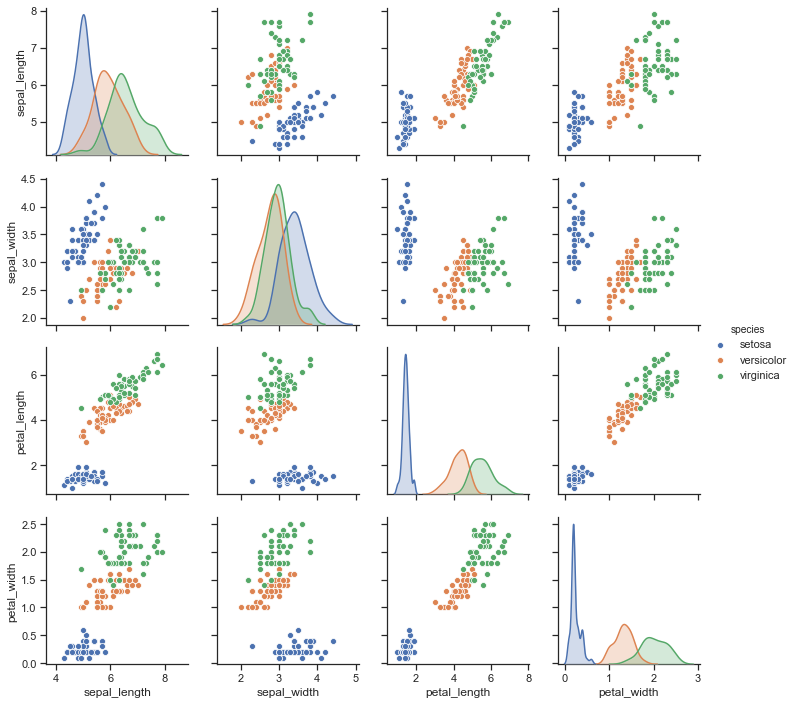

In [6]:
sns.pairplot(dfIris, hue="species");

## Classification loss

# Supervised classification

The most common loss function is the **zero-one** loss function:

$L(y, \hat y) = \delta(y \ne \hat y)$

where $\hat y$ is the best guess value of $y$

The **classification risk** of a model is the expectation value of the loss:

$E[L(y, \hat y)] = p(y \ne \hat y)$

For the zero-one loss function the risk is equal to the **misclassification rate** or **error rate**

# Accuracy

$\Large \rm accuracy = \frac{\#\ correct\ labels}{total}$

Note that this is one minus the classification risk.

# Types of errors

Accuracy and classification risk are not necessarily good diagnostics of the quality of a model. 

It is better to distinguish between two types of errors:

1. Assigning the label 1 to an object whose true class is 0 (a **false positive**)

2. Assigning the label 0 to an object whose true class is 1 (a **false negative**)

![](images/errors.jpg)

In [36]:
from IPython.display import HTML
HTML('<iframe width="900" height="500" src="https://www.youtube.com/embed/8YWl7tDGUPA" frameborder="0" allowfullscreen></iframe>')

/Users/mauricio/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Diagnostics

# Completeness and contamination

$\Large \rm completeness\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$

$\Large \rm contamination\ =\ \frac{false~ positives}{true~ positives~ +~ false~ positives}$


# Recall and precision

In the machine learning community, the completeness and 1 - contamination are called **recall** and **precision**, respectively.

$\Large \rm recall\ =\ completeness\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$

$\Large \rm precision\ = 1 - contamination = \ \frac{true~ positives}{true~ positives~ +~ false~ positives}$



# True positive rate (TPR) and false positive rate (FPR)


$\Large \rm TPR\ =\ recall\ =\ completeness\ =\ \frac{true~ positives}{true~ positives~ +~ false~ negatives}$

$\Large \rm FPR\ = \ \frac{false~ positives}{false~ positives~ +~ true~ negatives}$



![](images/Precisionrecall.svg.png)

### Problems with the accuracy 

To show why accuracy is not a very useful statistic let's consider the following example.

e.g. 

**A model to predict whether a person is from a given country (with a population of 37 million people)**

*Simple (and wrong) model*: considering that the world population is 7.5 billion people, predict that a person is from that country with a probability 37/7500.

correct labels = $(7,500,000,000 - 37,000,000) * (1 - 37/7500) + 37,000,000 * 37/7500 = 7,426,365,067$

$\Large \rm accuracy = \frac{7,426,365,067}{7,500,000,000} = 0.99$


Our classifier is 99% accurate, but it is clearly too simplistic!

### Precision and recall are better

Let's try precision and recall instead.

True positives: $37,000,000 * 37/7500 = 182,533$

False positives: $(7,500,000,000 - 37,000,000) * 37/7500 = 36,817,467$

False negatives: $37,000,000 * (1 - 37/7500) = 36,817,467$

$\Large \rm recall = \frac{182,533}{182,533 + 36,817,467} = 0.005$

$\Large \rm precision = \frac{182,533}{182,533 + 36,817,467} = 0.005$

Our classifier has only 0.5% recall and precision!

![](images/Precisionrecall.svg.png)

# F1 score

A simple statistic which takes into account both precision and recall is the  **$\rm \bf F_1$ score**, which is twice their harmonic mean.


$\Large \rm F_1 = 2\ \frac{1}{\frac{1}{precision}\ +\ \frac{1}{recall}} = 2\ \frac{precision\ \times\ recall}{precision\ +\ recall}$

# F$_\beta$ score

To give more or less weight to recall vs precision, the $F_\beta$ score is used:

$\Large \rm F_\beta = (1 + \beta^2) \frac{precision\ \times\ recall}{\beta^2\ precision\ +\ recall}$ 

$F_\beta$ was derived so that it measures the effectiveness of retrieval with respect to a user who attaches **$\beta$ times as much importance to recall as precision**.

# Macro vs micro averages

When evaluating the different diagnostics in a multiclass problem one can choose to do macro or micro averages

**Macro averaging**

    Compute diagnostics for every class. Take average of the class diagnostics 
    

**Micro averaging**

    Consider all true positives, false positives, etc.. without making a distinction between classes
    
    


e.g.

| Label | TP | FP | FN | Precision | Recall |
| - | - | - | - | - | - |
| c1 | 3 | 2 | 7 | 0.6 | 0.3 |
| c2 | 1 | 7 | 9 | 0.12 | 0.1 |
| c3 | 2 | 5 | 6 | 0.29 | 0.25 |
| Total | 6 | 14 | 22 | . | . | 
| Macro averaged | . | . | . | 0.34 | 0.22 |
| Micro averaged | . | . | . | 0.3 | 0.21 |


$\Large \rm Macro_{precision} = \frac{1}{3} \times \biggl( \frac{3}{3 + 2} + \frac{1}{1 + 7} + \frac{2}{2 + 5} \biggr) = 0.34$ 

$\Large \rm Micro_{precision} = \frac{6}{6 + 14} = 0.3$ 


![](images/Precisionrecall.svg.png)

# Confusion matrix

Also known as error matrix.

The elements of the matrix correspond to the number (or fraction) of instances of an actual class which were classified as another class.

A perfect classifier has the identity as its normalized confusion matrix.



![](images/unnormconfusion.png) ![](images/normconfusion.png)

![](images/Precisionrecall.svg.png)

# ROC curve

The **receiver operating characteristic (ROC)** curve is a visualization of the trade-off between the recall and precision of a classifier as the discrimination threshold is varied.

It plots the **true positive rate (TPR)** vs the **false positive rate (FPR)** at various thresholds.



![](images/ROC.png)

In [10]:
from IPython.display import Image
Image(url="images/roc_curve.gif")

# Area under the curve (AUC) and Gini coefficient (G1)

The AUC is equal to the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

 * A larger AUC indicates a better classification model
 * A perfect classifier has AUC = 1
 * A random classifier has AUC = 0.5 (note that the **no-discrimination line** is the identity) 
 * AUC is related to the **Gini coefficient**, which is the twice the area between the ROC and the no-discrimination line: $\Large \rm G_1 = 2 AUC - 1$ 
 ![](images/gini.png)

The ROC AUC statistic is normally used to do model comparison.

# DET curve

An alternative to the ROC curve is the **detection error tradeoff (DET)** curve.

The DET curve plots the **false negative rate (missed detections) vs the false positive rate (false alarms)** on non-linearly transformed axis in order to emphasize regions of low FPR and low FNR.

![](images/DET.png)

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

![](images/sklearn_metrics.png)

# Types of classifiers

A lot of classification models have been proposed. Some of them are:

* Support Vector Machines (SVM)
* Artificial Neural Networks
* Decision Trees
* Gaussian Mixture Models
* Ensembles (multiple models)
* Boosting (set of weak classifiers)

![](images/SVM.png)

![](images/trees.png)

![](images/ANN.png)

![](images/GMM.png)

In [9]:
HTML('<iframe width="900" height="500" src="https://www.youtube.com/embed/9NrALgHFwTo" frameborder="0" allowfullscreen></iframe>')
#HTML('<iframe width="900" height="500" src="https://www.youtube.com/embed/8YWl7tDGUPA" frameborder="0" allowfullscreen></iframe>')

This video is an illustration of Cover's theorem, which states that a nonlinear classification problem can be converted to a linear classification problem by mapping the input vectors from the input space to a higher dimensional feature space. In this example, a 2-dimensional classification is mapped into 3-dimensions using a 2-dimensional Gaussian function.to augment the input vectors.

## Scikit-Learn API

* Base object is the estimator
* Any object that learns from data
    * Classification, regression, clustering, or transformer 


* parameters passed to estimator

```python
    estimator = Estimator(*args, **kwargs)
```

* `fit` method provided

```python
    estimator.fit(X, y)
```
    
* Computed parameters have an underscore appended

```python
    estimator.coef_
```

* Method to predict probability

```python
    estimator.predict_proba(X)
```

# Two classes, one feature classification example

We will show a simple example of a classifier between two classes which have only one feature.

We use sklearn.datasets.make_classification to generate some data, sklearn.model_selection.train_test_split to split the data into training and test, sklearn.svm.SVC as the classification model, sklearn.metrics.roc_curve to generate the ROC curve.


In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# data sets
from sklearn.datasets import make_classification

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# metrics 
from sklearn import metrics

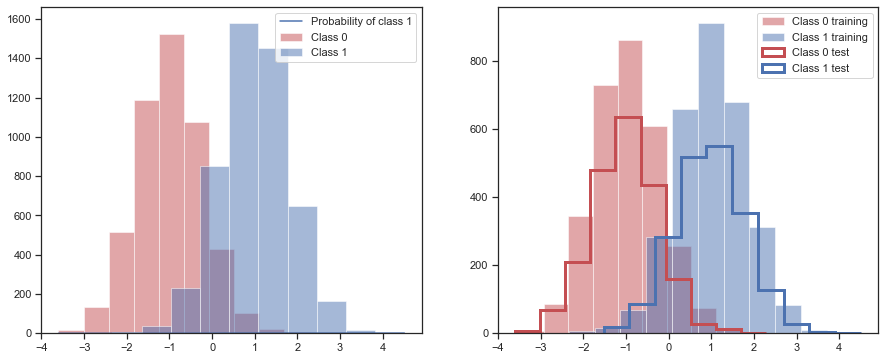

In [8]:
# generate data and classes
X, y = make_classification(n_samples = 10000, n_classes = 2, n_features=1, n_redundant=0, n_informative=1,
                           random_state=40, n_clusters_per_class=1)

# histograms of the two classes
fig, ax = plt.subplots(ncols = 2, figsize = (15, 6))
ax[0].hist(X[y == 0], color = 'r', alpha = 0.5, label = "Class 0");
ax[0].hist(X[y == 1], color = 'b', alpha = 0.5, label = "Class 1");

# split the data and plot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=30)
ax[1].hist(X_train[y_train == 0], color = 'r', alpha = 0.5, label = "Class 0 training");
ax[1].hist(X_train[y_train == 1], color = 'b', alpha = 0.5, label = "Class 1 training");
ax[1].hist(X_test[y_test == 0], color = 'r', histtype = 'step', lw = 3, label = "Class 0 test");
ax[1].hist(X_test[y_test == 1], color = 'b', histtype = 'step', lw = 3, label = "Class 1 test");
# train a c-support vector classifier and plot the probability
clf = SVC(kernel="linear", C=0.025, probability = True)
clf.fit(X_train, y_train)
y_test_pred = clf.predict_proba(X_test)[:, 1]
xs = np.linspace(min(X), max(X), 100)

probs = clf.predict_proba(xs)[:, 1]
ax[0].plot(xs, probs, label = "Probability of class 1")
ax[0].legend()
ax[1].legend()


In [10]:
def fun(thr):
    P =y_test_pred > thr
    V =y_test == 1
    TP = (P & V).sum()
    TN = (~P & ~V).sum()
    FP = (P & ~V).sum()
    FN = (~P & V).sum()
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    return([FPR,TPR])

vec = np.linspace(0,1,1000)
myRoc = []
for x in vec:
    myRoc.append(fun(x))
arr=np.array(myRoc)

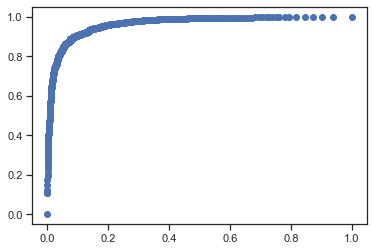

In [11]:
plt.scatter(arr[:,0],arr[:,1])

Text(0, 0.5, 'True positive rate')

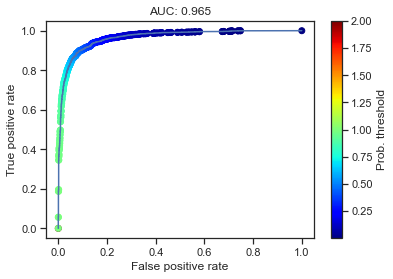

In [12]:
# get the ROC curve
fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
fig, ax = plt.subplots()
ax.set_title("AUC: %.3f" % metrics.roc_auc_score(y_test, y_test_pred))
ax.plot(fpr, tpr)
sc = ax.scatter(fpr, tpr, lw = 1, c = thresh, cmap = matplotlib.cm.jet)
cb = plt.colorbar(sc)
cb.set_label('Prob. threshold')
ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

![](images/Precisionrecall.svg.png)

/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'F1-score')

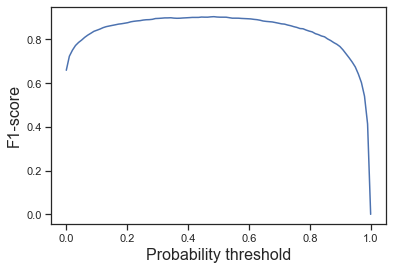

In [13]:
# get F1 score for different probability thresholds
fig, ax = plt.subplots()
xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(y_test, y_test_pred >= prob), xs))
ax.plot(xs, f1scores)
ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16)

Function for plotting the confusion matrix

http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [14]:
# Function to pretty print the confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


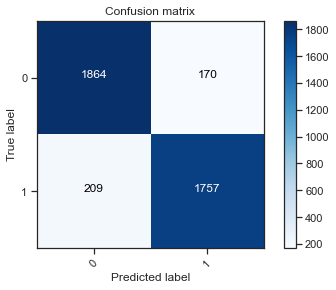

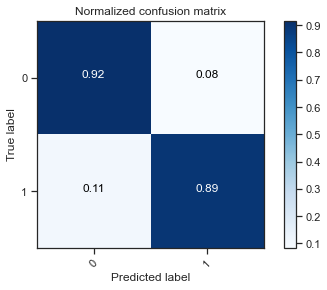

In [15]:
plt.subplots()
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred >= 0.5), range(2))
plt.subplots()
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred >= 0.5), range(2), normalize=True, title='Normalized confusion matrix')

# Classification model examples from sklearn

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Comparison between different classifiers on three different simulated datasets: "Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes" and "QDA".

![](images/sklearn_classification.png)

/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.

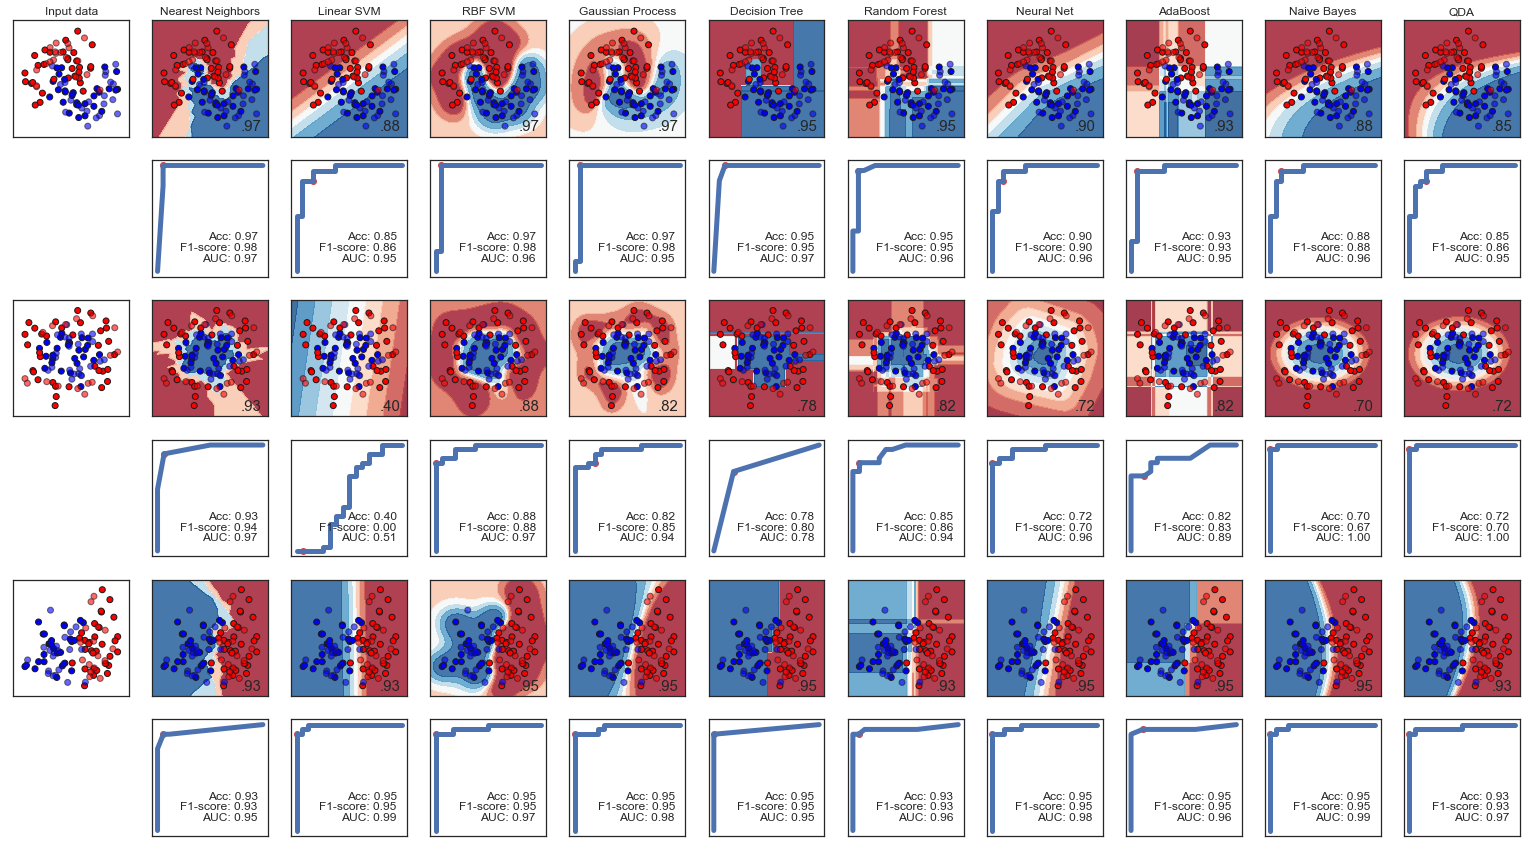

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# data sets
from sklearn.datasets import make_moons, make_circles, make_classification

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



h = .02  # step size in the mesh

# different classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=2, C=1, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# linearly separable datatest
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# all different datasets
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 15))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # test_size is 40% of the data
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
                
    # create grid to evaluate classifiers
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(2 * len(datasets), len(classifiers) + 1, i + ds_cnt * (len(classifiers) + 1))
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2 * len(datasets), len(classifiers) + 1, i + ds_cnt * (len(classifiers) + 1))
        
        # fit the model using the training set
        clf.fit(X_train, y_train)
        
        # compute the mean accuracy of the classifier
        score = clf.score(X_test, y_test)

        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')

        # plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        # set limits
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
        # remove ticks
        ax.set_xticks(())
        ax.set_yticks(())
        
        # write title only for the first data set for each classifier
        if ds_cnt == 0:
            ax.set_title(name)
            
        # plot the accuracy score
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        # compute ROC curve
        y_test_pred = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
        f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
        ax = plt.subplot(2 * len(datasets), len(classifiers) + 1, i + (ds_cnt + 1) * (len(classifiers) + 1))
        ax.set_xlim(-.05, 1.05)
        ax.set_ylim(-.05, 1.05)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
        ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
        ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
        ax.plot(fpr, tpr, lw = 5)
        idx = np.argmin(np.abs(thresholds - 0.5))
        ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')

        # counter 
        i += 1

# Multiclass classification

Some classifiers are inherently multiclass:

* Naive Bayes

* Logistic Regression

* K Nearest Neighbours

Other classifiers are binary:

* support vector machine

* perceptron

* boosting

These classifiers requiere modifications to become multiclass

# Binary to multiclass

In order to make a binary classifier multiclass we can do different things:

Let us assume there are k classes


* **One vs the rest**: build k classifiers which classify one class vs all the others. 

   * It will fail if any classifier fails!
   
   ![](images/onevsall.png)
 
 
* **One vs one**: build k (k - 1) / 2 classifiers using all possible pairs of classes. Make the classifiers vote to decide the class.

   * Training each class only uses elements from pairs of classes -> training can be faster
   
   * Evaluation can be slower since we need to run more models
   
   * This is used by **sklearn for SVM classifiers SVC and NuSVC**
   
   ![](images/allpairs.png)
   
* **Error correcting output codes**: use sequences of ones or zeros to represent each class (codewords). Train as many classifiers as the number of bits in the codewords. Apply the classifier and select the class with the closest codeword.

    * Selecting codewords with more bits than classes allows for some redundancy, hence the "Error Correcting" name
    
    * Example of ten classes and codewords of 15 bits.  In this case 15 binary classifiers are trained.
    
    ![](images/ECOC.png)

# Multiclass classifier 

# NIST dataset

http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

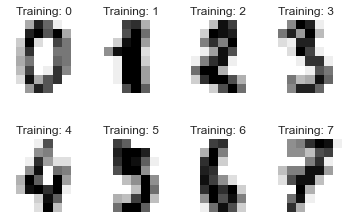

In [17]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
%matplotlib inline

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits
# images are in digits.images and their associated numbers in digits.target
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [65]:
n_samples/2

NameError: name 'n_samples' is not defined

In [18]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97     

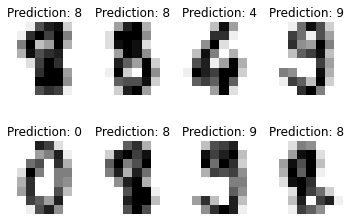

In [67]:
# now we confirm our predicted images

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

Normalized confusion matrix


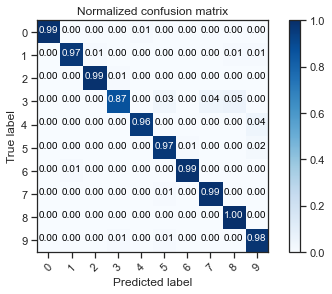

In [19]:
# Confusion matrix
import numpy as np
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted), classes=range(10), normalize=True,
                      title='Normalized confusion matrix')

# Multiclass classification iris dataset

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


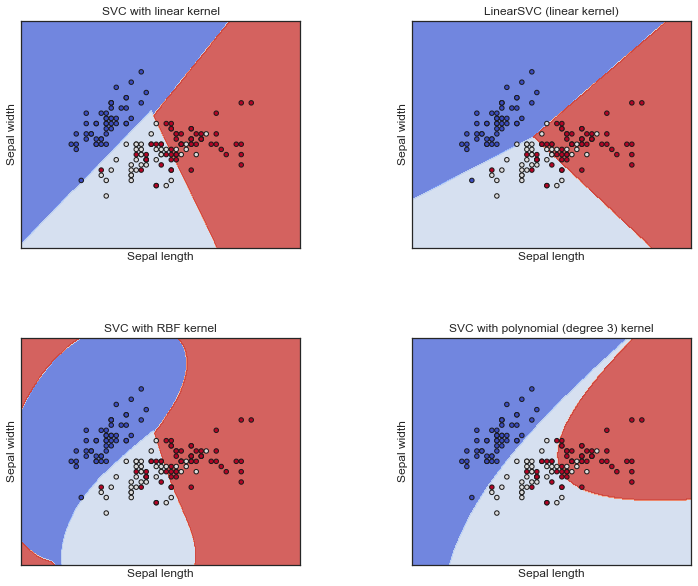

In [21]:
# import the dataset
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# plot titles
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize = (12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Training, validation and test sets

It is clear that the separattion between training and test sets is needed in order to avoid overfitting.

However, when optimizing the **hyperparameters** of a classification model one must use some test set as diagnostic. 

This means that the hyperparameters can be **overfitted to the test set**.

In order to avoid this problem an intermediate test set is created: the **validation** set.

Thus, in general one will need **training**, **validation** and **test** sets to solve the classification problem, which has the disadvantage of reducing the set sizes even further.

# Cross-validation

A solution to the previous problem is called **cross--validation (CV)**, which is a family of set splitting strategies.

* The simplest is called **k-fold CV**: 
    
    A test set is held out for final evaluation. The training set is split into k smaller sets.
    
    A model is trained using k-1 of the folds as training data.
    
    The resulting model is evaluated on the remaining part of the data.
    
    The performance measure reported by k-fold CV is the average of the previous values.

# Variations on k-fold

* **Repeated k-fold**:

    Repeat k-fold CV n times, producing different folds each time
    

* **Leave One Out (LOO)**:

    Each learning is created by taking all samples except one
    
    For n samples, we have n different training sets
    
    As a general rule, 5 or 10-fold CV is preferred
    

* **Leave P out (LPO)**:

    Similar to LOO, but removing p samples
    

* Random permutations and split (**shuffle & split**):

    A user defined number of independents train / validation dataset splits. Each time samples are shuffled and then split.


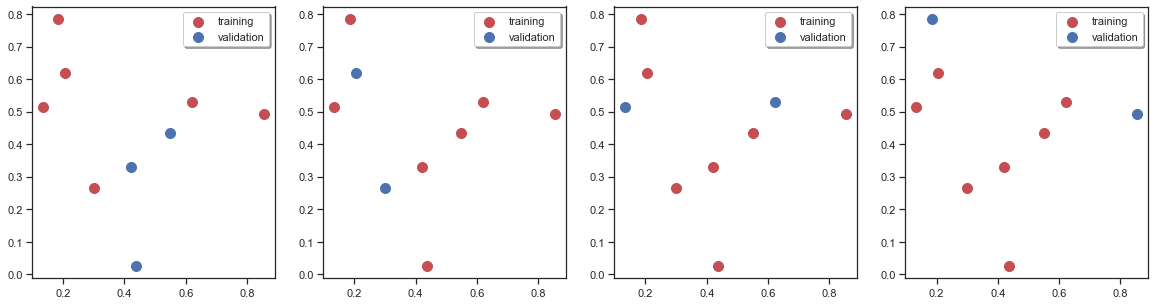

In [22]:
# K-fold with 4 split
np.random.seed(2)
X = np.random.random((9, 2))

from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit

n_splits = 4

# Kfold
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = KFold(n_splits=n_splits)
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][:, 0], X[train][:, 1], c = 'r', s = 100, label = 'training')
    ax[idx].scatter(X[test][:, 0], X[test][:, 1], c = 'b', s = 100, label = 'validation')
    ax[idx].legend(frameon=True, shadow=True);

# note that any point is blue once and only once

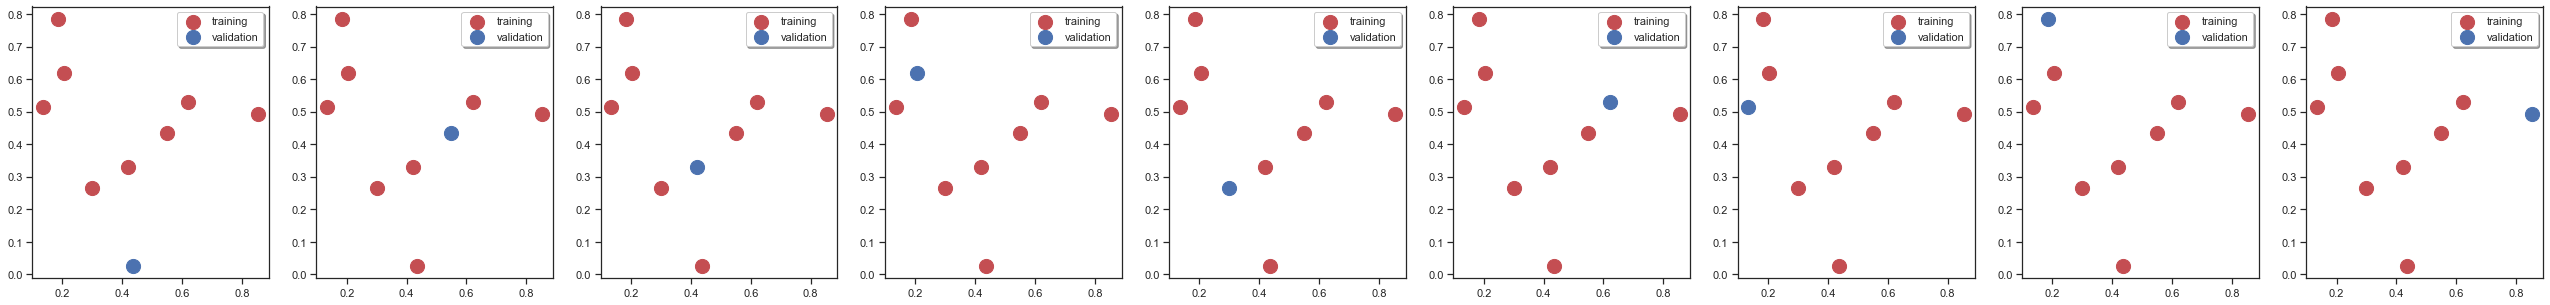

In [23]:
# Leave one out

fig, ax = plt.subplots(ncols = len(X), figsize = (len(X) * 5, 5))
kf = LeaveOneOut()
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][:, 0], X[train][:, 1], c = 'r', s = 200, label = 'training')
    ax[idx].scatter(X[test][:, 0], X[test][:, 1], c = 'b', s = 200, label = 'validation')
    ax[idx].legend(frameon=True, shadow=True);


# note that only one point is left out each time

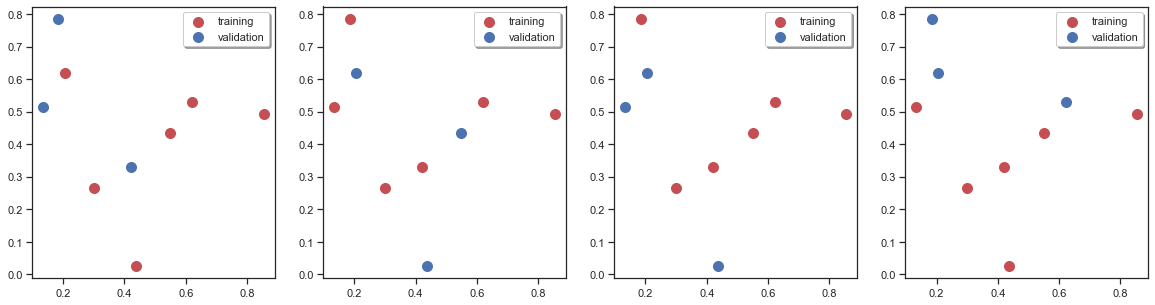

In [24]:
# Shuffle & Split

fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = ShuffleSplit(n_splits = n_splits, test_size = 0.25)
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][:, 0], X[train][:, 1], c = 'r', s = 100, label = 'training')
    ax[idx].scatter(X[test][:, 0], X[test][:, 1], c = 'b', s = 100, label = 'validation')
    ax[idx].legend(frameon=True, shadow=True);


# note that some points can be blue more than once and some are red always

# Variations on k-fold taking that try to balance class labels

* **stratified k-fold CV**:

    Each set contains approximately the same percentage of samples of each target class as the complete set

In [25]:
np.random.seed(2)
X = np.random.random((20, 2))
y = np.random.random(20) > 0.3 # 70% circles + 30% stars

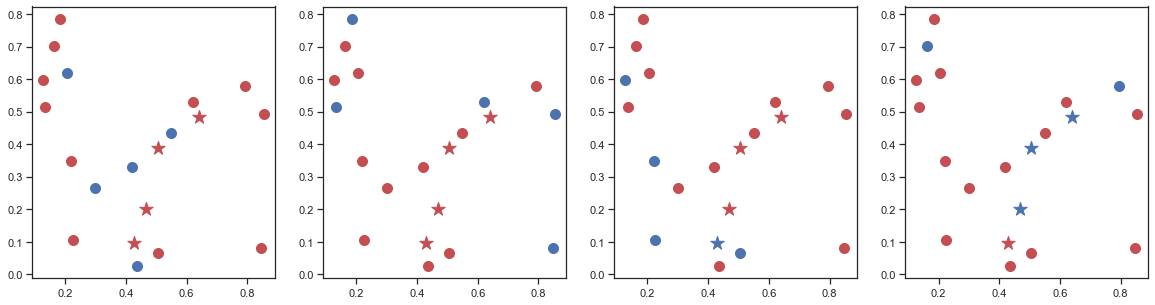

In [26]:
n_splits = 4
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = KFold(n_splits = n_splits)
for idx, traintest in enumerate(kf.split(X)):
    train, test = traintest
    ax[idx].scatter(X[train][~y[train]][:, 0], X[train][~y[train]][:, 1], marker = '*', s = 200, c = 'r', label = 'training class 0')
    ax[idx].scatter(X[test][~y[test]][:, 0], X[test][~y[test]][:, 1], marker = '*', s = 200, c = 'b', label = 'validation class 0')
    ax[idx].scatter(X[train][y[train]][:, 0], X[train][y[train]][:, 1], c = 'r', s = 100, label = 'training class 1')
    ax[idx].scatter(X[test][y[test]][:, 0], X[test][y[test]][:, 1], c = 'b', s = 100, label = 'validation class 1')
    
    
# note that in 1st and 2nd splits the validation set does not contain any stars

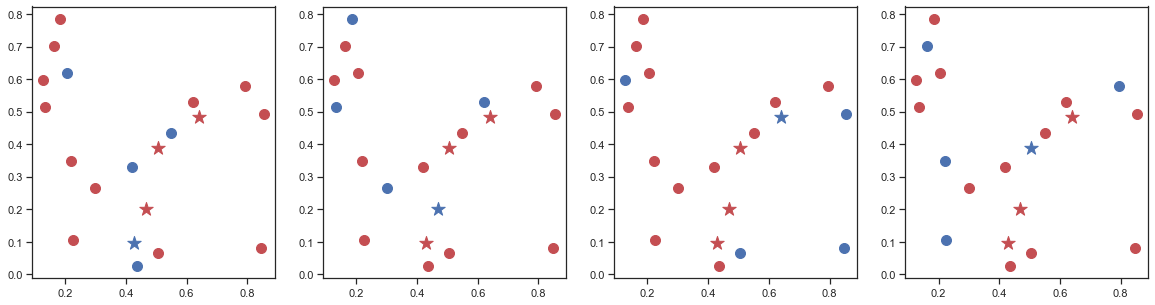

In [27]:
n_splits = 4
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = StratifiedKFold(n_splits = n_splits)
for idx, traintest in enumerate(kf.split(X, y)):
    train, test = traintest
    ax[idx].scatter(X[train][~y[train]][:, 0], X[train][~y[train]][:, 1], marker = '*', s = 200, c = 'r', label = 'training class 0')
    ax[idx].scatter(X[test][~y[test]][:, 0], X[test][~y[test]][:, 1], marker = '*', s = 200, c = 'b', label = 'validation class 0')
    ax[idx].scatter(X[train][y[train]][:, 0], X[train][y[train]][:, 1], c = 'r', s = 100, label = 'training class 1')
    ax[idx].scatter(X[test][y[test]][:, 0], X[test][y[test]][:, 1], c = 'b', s = 100, label = 'validation class 1')
    
# note that the validation set contains at least one star in each fold

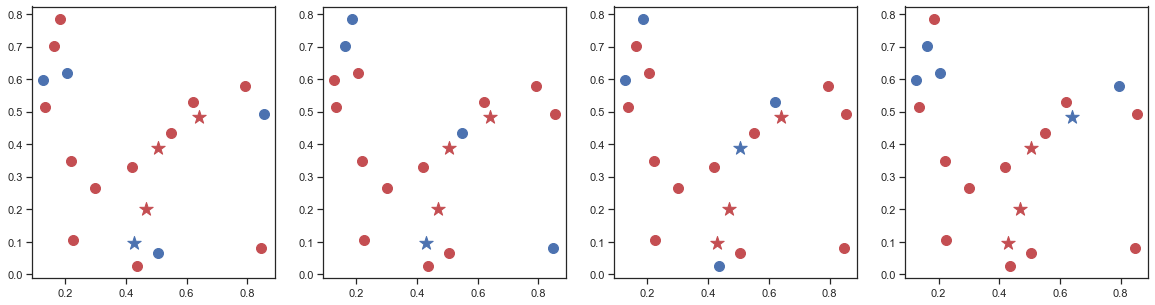

In [28]:
n_splits = 4
fig, ax = plt.subplots(ncols = n_splits, figsize = (n_splits * 5, 5))
kf = StratifiedShuffleSplit(n_splits = n_splits, test_size = 0.25)
for idx, traintest in enumerate(kf.split(X, y)):
    train, test = traintest
    ax[idx].scatter(X[train][~y[train]][:, 0], X[train][~y[train]][:, 1], marker = '*', s = 200, c = 'r', label = 'training class 0')
    ax[idx].scatter(X[test][~y[test]][:, 0], X[test][~y[test]][:, 1], marker = '*', s = 200, c = 'b', label = 'validation class 0')
    ax[idx].scatter(X[train][y[train]][:, 0], X[train][y[train]][:, 1], c = 'r', s = 100, label = 'training class 1')
    ax[idx].scatter(X[test][y[test]][:, 0], X[test][y[test]][:, 1], c = 'b', s = 100, label = 'validation class 1')
    
# note that the validation now contains at least one star each time, and they can be repeated

# Unbalanced classification

Here we illustrate the problem of training with unbalanced classes

http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

No handles with labels found to put in legend.


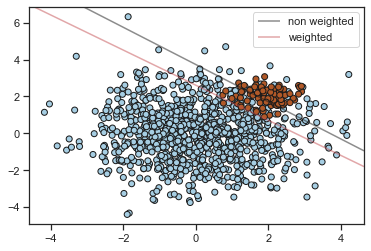

In [30]:
# let's create 40 separable points
rng = np.random.RandomState(4)
# size of classes with 10:1 ratio
n_samples_1 = 1000
n_samples_2 = 100
# X values 
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
# classes
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane weighting the classes by the inverse of their sizes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot separating hyperplanes and samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# plot the decision functions for both classifiers
# ---------

# start plot
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")

Note that whether to use weighted training depends on what is our aim.

# Finding an hyperparameter

We will use the previous example of an unbalanced set.

 * We will first do a Stratified test-training split.
 * Then we will use StratifiedKFold to build validation sets
 * We will choose the best hyperparameter C for the previous classifier based on the average AUCs.



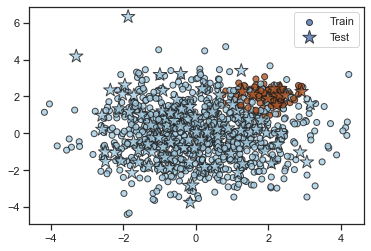

In [31]:
# extract the test and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1)
fig, ax = plt.subplots()
ax.scatter(X_train[:, 0], X_train[:, 1], marker = 'o', edgecolors = 'k', c = y_train, cmap = matplotlib.cm.Paired, alpha = 0.8, label = 'Train')
ax.scatter(X_test[:, 0], X_test[:, 1], marker = '*', edgecolors = 'k', s = 200, c = y_test, cmap = matplotlib.cm.Paired, alpha = 0.8, label= 'Test')
plt.legend()

Final AUC in test set: 0.9700


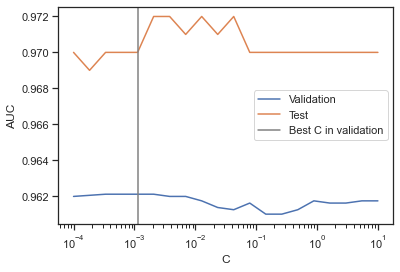

In [32]:
X_train = np.array(X_train)
y_train = np.array(y_train)

fig, ax = plt.subplots()

Cs = np.logspace(-4, 1, 20)
AUCs = np.zeros_like(Cs)

# vary the error penaly parameter C between 0.1 and 10 in a logarithmic grid
for idx, C in enumerate(Cs):
    print(C, end = '\r')

    # weighted classifier
    wclf = svm.SVC(C = C, kernel='linear', probability = True, class_weight={1: 10})
    
    # do 10-fold stratified splits
    n_splits = 10
    kf = StratifiedKFold(n_splits = n_splits)

    # train with the resulting training sets
    for train, validation in kf.split(X_train, y_train):
    
        wclf.fit(X_train[train], y_train[train])
        y_validation_pred = wclf.predict_proba(X_train[validation])[:, 1]
        AUCs[idx] += metrics.roc_auc_score(y_train[validation], y_validation_pred)
        
    AUCs[idx] /= n_splits
    
ax.plot(Cs, AUCs, label = 'Validation')
ax.set_xscale('log')
ax.set_xlabel("C")
ax.set_ylabel("AUC")

# choose best C value
idxbest = np.argmax(AUCs)
wclf = svm.SVC(C = Cs[idxbest], kernel='linear', probability = True, class_weight={1: 10})
wclf.fit(X_train, y_train)
y_test_pred = wclf.predict_proba(X_test)[:, 1]
finalAUC = metrics.roc_auc_score(y_test, y_test_pred)

print("Final AUC in test set: %.4f" % finalAUC)

# check what was the AUCs for different Cs in the test set
AUCs_test = np.zeros_like(AUCs)
for idx, C in enumerate(Cs):
    wclf = svm.SVC(C = C, kernel='linear', probability = True, class_weight={1: 10})
    wclf.fit(X_train, y_train)
    y_test_pred = wclf.predict_proba(X_test)[:, 1]
    AUCs_test[idx] = metrics.roc_auc_score(y_test, y_test_pred)

ax.plot(Cs, AUCs_test, label = 'Test')
ax.axvline(Cs[idxbest], c = 'gray', label = 'Best C in validation')
ax.legend()


# Summary:

* ### Different diagnostics to measure the quality of a classifier beyond its accuracy.

* ### Recall and precision and variations the key diagnostics, F1 and F$_\beta$ harmonic mean averages (incl. weights).

* ### Macro and micro averages can be used for all diagnostics

* ### ROC and DET curves allows visualizing trade--off between false positives and false negatives

* ### Area under the curve measures overall quality.

* ### Training, validation and test sets important to allow model selection without overfitting (knowledge leaking)

* ### Different techniques to avoid very small validation and test sets: variations on K-fold cross-validation (stratified important for unbalanced sets)

* ### Training with unbalanced sets may require weighting the sample

* ### Remember that you can train with the full dataset after all the previous tests in order to build a classifier which will be used in some other data

# Classification methods

# Bayes rule

Given a set of data {${\bf x}$} of N points in D dimensions, such that $x_i^j$ is the $j$th feature of the $i$th point, and a set of discrete labels {$y$} drawn from $K$ classes, we can write:

$\Large p(y_k, {\bf x_i}) =  p(y_k | {\bf x_i}) p({\bf x}_i) = p({\bf x}_i | y_k) p(y_k)$

which implies that

$\Large p(y_k | {\bf x_i}) = \frac{p({\bf x}_i | y_k) p(y_k)}{p({\bf x}_i)} =  \frac{p({\bf x}_i | y_k) p(y_k)}{\sum_i p({\bf x}_i | y_k) p(y_k)}$

# Naive Bayes

If we make the strong assumption that all attributes are conditionally independent we can write:

$\Large p(x^i, x^j | y_k) = p(x^i | y_k) p (x^j | y_k)$,

This can be expressed as:

$\Large p(x^0, x^1, x^2, ... , x^N | y_k) = \prod_i p(x^i | y_k)$

Applying Bayes' rule this can be written as:

$\Large p(y_k | x^0, x^1, x^2, ... , x^N) = \frac{p(x^0, x^1, x^2, ... , x^N | y_k) p(y_k)}{\sum_j p(x^0, x^1, x^2, ... , x^N|y_j) p(y_j)}$

which assuming conditional independence becomes:

$\Large p(y_k | x^0, x^1, x^2, ... , x^N) = \frac{\prod_i p(x^i | y_k) p(y_k)}{\sum_j \prod_i p(x^i | y_j) p(y_j)}$

Using the previous expression we can compute the most likely value of $y$ by maximizinng over $y_k$:

$\Large \hat y = argmax_{y_k} \frac{\prod_i p(x^i | y_k) p(y_k)}{\sum_j \prod_i p(x^i | y_j) p(y_j)} = argmax_{y_k} \frac{\prod_i p_k(x^i) \pi_k}{\sum_j \prod_i p_j(x^i) \pi_j}$

defining $\Large p_k(x^i) \equiv p(x^i | y_k)$ and $\Large \pi_k \equiv p(y_k)$

The challenge is then to determine $p_k(x^i)$ and $\pi_k$ from a training set.

This is usually done with parametrized models, or more general parametric or non parametric density estimation techniques.

Very simple example: when the features are categorical. For each label $y_k$ in the training set, the maximum likelihood estimate of the probability for feature $x^i$ is the number of objetcs with a particular value $x^i$ divided by the total number of objects with the same label. The values of $\pi_k$ are the fraction of data with $y = y_k$.

# Gaussian Naive Bayes Classifier

In this case the probabilities $p_k(x^i)$ are modeled as one dimensional normal distributions.

Using this model, the maximum likelihood estimator becomes:

$\Large \hat{y} = argmax_{y_k} \biggl[ \ln \pi_k - \frac{1}{2} \sum_1^N \bigg(2 \pi (\sigma_k^i)^2 + \frac{(x^i - \mu_k^i)^2}{(\sigma_k^i)^2)} \biggr) \biggr]$

 Example of Gaussian Naive Bayes classification:
 ![](images/NaiveBayes.png)
 ![](images/NaiveBayes_class.png)


# Gaussian Bayes Classifier

The next step is to relax the assumption of conditional independence. This can be done including covariances in the model distributions.

A multivariate Gaussian can be expressed as:

$\Large p_k({\bf x}) = \frac{1}{\bigl|\sum_k\bigr|^{1/2} (2 \pi)^{D/2}} \exp \bigg\lbrace -\frac{1}{2} ({\bf x} - \mu_k)^T \sum_k^{-1} ({\bf x} - \mu_k) \biggr\rbrace$

where $\sum_k$ is a $D x D$ symmetric covariance matrix with determinant $\bigl|\sum_k\bigr|$

Using this result, the Gaussian Bayes classifier estimator for $\hat{y}$ is:

$\Large \hat{y} = argmax_k \biggl\lbrace -\frac{1}{2} \log \bigl|\sum_k\bigr| - \frac{1}{2} ({\bf x} - \mu_k)^T \sum_k^{-1} ({\bf x} - \mu_k) + \log \pi_k \biggr\rbrace$

or 

$\Large \hat{y} =  \begin{cases} 1, & \text{if}\ m_1^2 < m_0^2 + 2 \log \biggl(\frac{\pi_1}{\pi_0}\biggr) + \biggl(\frac{|\sum_1|}{|\sum_0|}\biggr) \\
      0, & \text{otherwise} \end{cases}$
    

where $\Large m_k^2 = (x - \mu_k)^T \sum_k^{-1} (x - \mu_k)$ is the Mahalanobis distance

See more in 
http://scikit-learn.org/stable/modules/naive_bayes.html

# Linear Discriminant Analysis (LDA)

In this case we assume that the distributions of $p_k(\vec{x})$ have the same covariance matrices.

The optimal classifier can be derived from the log of the class posteriors:

$\Large g_k({\bf x}) = {\bf x}^T \sum^{-1} \mu_k - \frac{1}{2} \mu_k^T \sum^{-1} + \log \pi_k$

The discriminant boundary between the classes is the line that minimizes the overlap between the Gaussians, i.e. it is linear in $\bf x$:

$\Large g_k({\bf x}) - g_l({\bf x}) = {\bf x}^T \sum^{-1} (\mu_k - \mu_l) - \frac{1}{2} (\mu_k - \mu_l)^T \sum^{-1} (\mu_k - \mu_l) + \log \biggl( \frac{\pi_k}{\pi_l} \biggr) = 0$

# Quadratic Discriminant Analysis (QDA)

If we don't assume that the covariances are the same between classes, the discriminant function between classes becomes quadratic in $\bf x$:

$\Large g({\bf x}) = -\frac{1}{2} \log |\sum_k| - \frac{1}{2} ({\bf x} - \mu_k)^T C^{-1} ({\bf x} - \mu_k) + \log \pi_k$


![](images/LDA_QDA.png)

In [14]:
# example
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X = np.random.random((100, 2)) # 100 pts in 2 dims
y = ( X[:, 0] + X[:, 1] > 1).astype(int)

# simple division
lda = LDA()
lda.fit (X, y)
y_pred = lda.predict(X)

qda = QDA()
qda.fit(X, y)
y_pred = qda.predict(X)

# Gaussian Mixture Model

We can further assume that the distribution of features in each classes can be modeled by a mixture of Gaussians, or even more generally by a multidimensional kernel density estimation for a non-parametric approach.

The first case is called **Gaussian Mixture Model classification** and the second case **Kernel discriminant analysis**.

The kernel discriminant analysis can be thought as the limit of the Gaussian Mixture Model where every point is represented by a Gaussian. In this case the optimization of the model is simply over the kernel bandwidth, so it is computationally more simple.

![](images/GMM_class.png)


# K-nearest neighbor classifier

One of the most widely used and powerful classifiers: simply uses the label of the nearest point!

Intuitive justification is that  $\Large p(y|x) \approx p(y|x')$  if  $\Large x \approx x'$.

Method is completely **non--parametric**

Resulting decision boundary is a Voronoi tesselation of the attribute space.

The number of neighbors K is used as a smoothing parameter to regulate the complexity of the classification.

Weights can be assigned by weighting the votes by their distance.

![](images/Knearest.png)


### Problem: 
A metric must be defined to compute a multidimensional distance.

When features have different dimensions this can be arbitrary. 

Some approaches:

- normalization of the features (scaling from 0 to 1)
- weighting the importance of features based on cross-validation
- use of Mahalanobis distance: $\Large D(x, x_0) = (x-x_0)^T C^{-1} (x-x_0)$

This method works well when the training sample is large, when this is not the case a parametric classification model can be used.

# Discriminative classification

Direct modelling of the decision boundary: $\large g(x) = p(y = 1|x)$. The boundary would be defined by

\begin{equation}
\Large
\hat y = \begin{cases} 1  \ \ \ {\rm if}\  g(x) > 0.5 \\ 0 \ \ \ {\rm otherwise} \end{cases}
\end{equation}

# Logistic regression

An example of discriminative analysis where the discriminant function is modelled as:

$\Large p(y = 1|x) = \frac{\exp \biggl[ \sum_j \theta_j x^j \biggr]}{1 + \exp \biggl[ \sum_j \theta_j x^j \biggr]} = p({\bf \theta})$

It can be shown that this assumptions makes the log likelihood ratio linear in the parameters:

$\Large \log \biggl( \frac{p(y = 1 | x)}{p(y = 0 | x} \biggr) = \beta_0 + \beta_1 x$

![](images/logistic.png)

# Support vector machine

Consider the hyperplane that maximizes the margin $m$ between points:

![](images/SVM_Ivezic.png)


$\Large \max(m)_{\beta_0, \beta}$ subject to $\Large \frac{1}{||\beta||} y_i (\beta_0 + \beta^T x_i) \ge m, \ \ \ \forall i$

The solution to this problem can be done via quadratic programming. 

Additionally, the number of missclassifications can be bound via a regularization parameter $C$, which is analogous to using a *soft* margin.

![](images/SVM_Ivezic2.png)


One limitation of SVM is that it assumes a linear separation between model.

To solve that all dot products in the formulation of the problem are replaced by a kernel:

$\Large K(x_i, x_i') = \exp(-\gamma || x_i - x_i'||^2)$

where $\gamma$ is learnt through cross--validation. 

![](images/SVM_kernel.png)


# Decision trees

Another method for classification if decision trees. 

![](images/tree.png)

![](images/tree_2.png)

### Tree splitting

The difficulty in building a tree is which feature to choose and the value for splitting in each node. 

A simple splitting criterion is based on entropy:


$\Large E(x) = -\sum_i p_i(x) \ln(p_i(x))$


where $i$ is the class and $p_i(x)$ is the probability of that class given the training data.

We can define **information gain** as the reduction of entropy due to the partitioning of the data (the difference between the entropy of the parent node and the sum of the entropies of the child nodes).


For a binary split with $i=0$ representing points below the threshold and $i=1$ above the split threshold, the information gain $IG$ is:

$\Large IG(x|x_i) = E(x) - \sum_{i=0}^1 \frac{N_i}{N} E(x_i)$

where $N_i$ is the number of points, $x_i$, in the $i$ class, and $E(x)$ is the entropy associated with that class.

The search for the split is done in a *greedy* fashion, i.e. each feature is considered one at a time and the feature that provides the largest information gain is split.

The **misclassification error (MC)** is the fractional probability that a point selected at random will be missclassified:

$\Large MC = 1 - \max_i(p_i)$

To build the tree nodes are split until some stopping criteria is met. Common stopping criteria are:

- a node contains only one class of objects
- the split does not provide positive information gain or a reduction in the misclassification error
- the number of nodes per node reaches a predefined value 

# Bagging, boosting and Random forests

A different approach for classification is that of *ensemble learning*: combining the output of several models through some kind of voting or averaging.

In **bagging** we take averages over the prediction of a series of **bootstrap** samples from the training set. 


In **boosting** the samples are weighted by the misclassification error, emphasizing the most difficult cases.

In **random forests** this concept is expanded even further by generating a set of decision trees from the bootstrap samples with a random set of features.

Random forests containn $n$ trees and $m$ randomly selected features used per tree. Keeping $m$ small compared to the number of features controls the complexity of the model and reduces the concerns of over--fitting.

![](images/RF.jpg)

# Comparison of methods

![](images/summary_Ivezic1.png)

![](images/summary_Ivezic2.png)

![](images/summary_table.png)